# Logistic Regression on MNIST dataset

In [1]:
import pandas as pd
import numpy as np
import gzip
import matplotlib.pyplot as plt

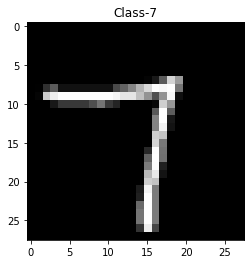

Train image 45014-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4  25  91
  212 154   0   0   0   0   0   0   0   0]
 [  0   1  49  91  17  17  17  17  

In [2]:
# Load the MNIST dataset
with gzip.open('train-images-idx3-ubyte.gz', 'rb') as f:
        X_train = np.frombuffer(f.read(), dtype=np.uint8, offset=16).reshape(-1, 28*28)
    
with gzip.open('train-labels-idx1-ubyte.gz', 'rb') as f:
        y_train = np.frombuffer(f.read(), dtype=np.uint8, offset=8)
    
with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as f:
        X_test = np.frombuffer(f.read(), dtype=np.uint8, offset=16).reshape(-1, 28*28)
    
with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as f:
        y_test = np.frombuffer(f.read(), dtype=np.uint8, offset=8)
   
rand_ids = np.random.choice(X_train.shape[0])
plt.imshow(X_train[rand_ids,:].reshape(28,28), cmap='gray')
plt.title('Class-'+str(y_train[rand_ids]))
plt.show()
print('Train image {}-th sample ' .format(rand_ids))
print(X_train[rand_ids, ].reshape(28,28))

# Normalize the matrix
X_train= X_train/255.0
X_test= X_test/255.0

# Split the training set into new training set and validation set
index = int(0.8 * X_train.shape[0])
X_new_train = X_train[:index]
y_new_train = y_train[:index]
X_val = X_train[index:]
y_val = y_train[index:]

In [3]:
def logistic_train(X, y, label, lr, max_iters):
    samples, features = X.shape
    y_train = np.where(y == label, 1, 0).reshape(-1, 1)
    w = np.zeros((features, 1))
    b = 0
    
    for i in range(max_iters):
        # Compute the logits and predictions
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)
        # Compute the gradients
        gradw = (1/samples) * np.dot(X.T, (y_pred - y_train))
        gradb = (1/samples) * np.sum(y_pred - y_train)
        # Update the weights and bias
        w -= lr * gradw
        b -= lr * gradb
    
    return w, b

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
# Train multiple logistic regression model
lr = 0.1
rounds = 1000
models = []

for l in range(10):
    weights, bias = logistic_train(X_new_train, y_new_train, l, lr, rounds)
    models.append((weights, bias))

In [5]:
def predict(X, models):
    samples = X.shape[0]
    classes = len(models)
    y_pred = np.zeros((samples, classes))
    
    for i, (w, b) in enumerate(models):
        z = np.dot(X, w) + b
        y_pred[:, i] = sigmoid(z).flatten()

    return np.argmax(y_pred, axis=1)

In [6]:
# Predictions on the validation set
y_val_pred = predict(X_val, models)
accuracy = np.mean(y_val_pred == y_val)
print("Validation Accuracy=", accuracy*100)
df = pd.DataFrame({'True Label': y_val, 'Predicted Label': y_val_pred})
pd.crosstab(df['True Label'], df['Predicted Label'])

Validation Accuracy= 90.35


Predicted Label,0,1,2,3,4,5,6,7,8,9
True Label,,,,,,,,,,
0,1155,0,2,3,2,5,11,3,13,0
1,0,1238,3,3,2,6,2,3,14,1
2,9,16,1037,17,25,4,18,22,40,8
3,8,5,24,1089,1,46,13,5,39,12
4,1,10,5,1,1110,2,4,2,9,43
5,25,6,17,54,13,881,33,8,35,25
6,7,2,10,1,9,4,1125,1,10,1
7,12,17,20,7,13,3,1,1180,3,41
8,9,37,13,30,3,31,6,10,1037,22


In [7]:
# Predictions on the test set
y_pred = predict(X_test, models)
accuracy = np.mean(y_pred == y_test)
print("Test Accuracy=", accuracy*100)
df = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_pred})
pd.crosstab(df['True Label'], df['Predicted Label']) 

Test Accuracy= 90.23


Predicted Label,0,1,2,3,4,5,6,7,8,9
True Label,,,,,,,,,,
0,961,0,2,1,1,0,8,1,6,0
1,0,1101,2,3,1,1,4,2,21,0
2,8,11,886,20,15,0,19,16,48,9
3,6,1,20,908,1,24,5,13,21,11
4,2,4,7,0,898,1,10,1,11,48
5,18,6,5,47,17,714,20,10,41,14
6,11,3,4,3,9,12,909,1,6,0
7,3,18,26,6,9,0,1,926,2,37
8,11,12,9,21,8,23,13,15,851,11
